## Regression Using Recusrive Least Squares: Step by Step

In [114]:
import numpy as np
import matplotlib.pylab as plt

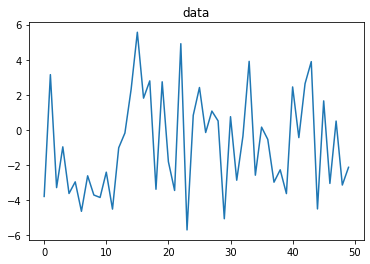

In [115]:
# generate data with some noise
N = 50
x = np.random.randn(N)
noise = np.random.randn(N)*0.5

# simple linear relation between x & y defined as:
y = 3 * x + noise

plt.title("data")
plt.plot(y)

### Simple Least Squares (for one variable)

solution: 2.8601550488663943


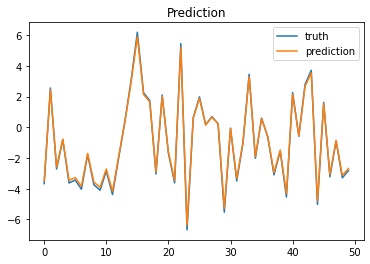

In [116]:
w = np.sum(x * y)/np.sum(x * x)
print("solution:", w) # w should be close to 3
plt.title("Prediction")
plt.plot(3 * x)
plt.plot(w * x)
plt.legend(["truth", "prediction"])

### Multiple Regression (for 2 variables)

In [117]:
# Here we need to find the relation between y and multiple variables: x1, x2
N = 50
x1 = np.random.randn(N)
x2 = x1 + np.random.randn(N)

y = 3 * x1 - 0.5 * x2

solution: 2.442525279810231 0.9532737023317541


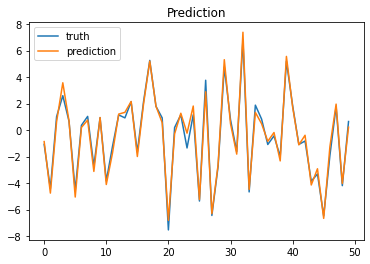

In [118]:
#1 a dummy solution to find the weights: 3 and 0.5
w1 = np.sum(x1 * y)/np.sum(x1 * x1)
w2 = np.sum(x2 * y)/np.sum(x2 * x2)
print("solution:", w1, w2)
y  = 3 * x1 + 0.5 * x2 #truth
yh = w1 * x1 + w2 * x2 #prediction
plt.title("Prediction")
plt.plot(y)
plt.plot(yh)
plt.legend(["truth", "prediction"])

solution: 3.557474720189769 0.22994554981115187


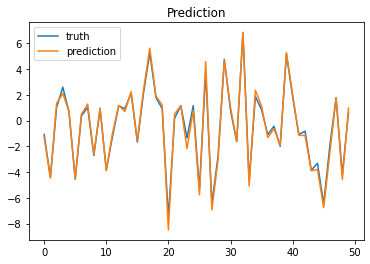

In [119]:
#2 a better solution with error prediciton
w1 = np.sum(x1 * y)/np.sum(x1 * x1)
e = y - w1 * x1
w2 = np.sum(e * x2)/np.sum(x2 * x2)
print("solution:", w1, w2)
y  = 3 * x1 + 0.5 * x2 #truth
yh = w1 * x1 + w2 * x2 #prediction
plt.title("Prediction")
plt.plot(y)
plt.plot(yh)
plt.legend(["truth", "prediction"])

solution: 3.0 0.5000000000000006


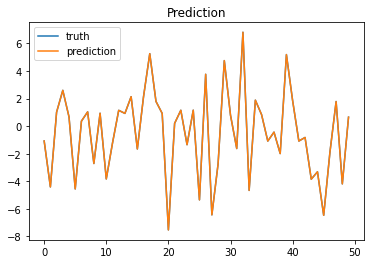

In [120]:
#3 a better solution with recursive least squares using error prediction method

# 1- removing the effect of x2 on x1 then finding its relation with y
w = np.sum(x1 * x2)/np.sum(x2 * x2)
e = x1 - w * x2
w1 = np.sum(e * y)/np.sum(e * e)

# 2- removing the effect of x1 on x2 then finding its relation with y
w = np.sum(x2 * x1)/np.sum(x1 * x1)
e = x2 - w * x1
w2 = np.sum(e * y)/np.sum(e * e)

print("solution:", w1, w2)
y  = 3 * x1 + 0.5 * x2 #truth
yh = w1 * x1 + w2 * x2 #prediction
plt.title("Prediction")
plt.plot(y)
plt.plot(yh)
plt.legend(["truth", "prediction"])

### Multiple Regression (for multiple variables)

In [121]:
N = 100 #number of the subjects
M = 10 #number of the variables
xs = np.random.randn(M, N)
ws = np.random.randn(M)
ys = ws @ xs

1- Offline method: Complexity = 1/2 * O(n, m^2)

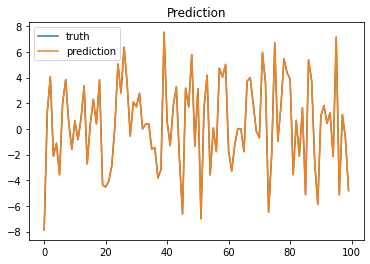

In [122]:
x = xs.copy()  #make copies of xs & ys before modifying them 
y = ys.copy()
wy = np.zeros(M)
for i in range(M):
    for j in range(i+1, M):
        wx = np.sum(x[i] * x[j]) / np.sum(x[i]**2)
        x[j] -= wx * x[i]
        
for i in range(M-1,-1, -1):
    wy[i] = np.sum(y * x[i]) / np.sum(x[i]**2)
    y -= wy[i] * xs[i]
    

yh = wy @ xs #prediction
plt.title("Prediction")
plt.plot(ys)
plt.plot(yh)
plt.legend(["truth", "prediction"])   

2- Online Method: Complexity = 1/2 * O(n, m^2)

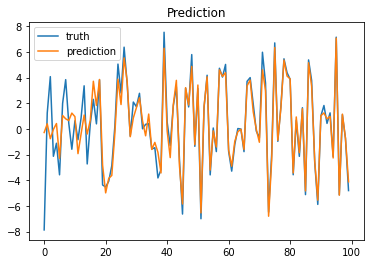

In [123]:
wx = np.zeros((M, M))
wy = np.zeros(M)
xy = np.zeros(M)
xx = np.zeros((M, M))
sx = np.zeros(M) + 0.0001
yh = np.zeros(N)
for n in range(N-1):
    x = xs[:, n]
    y = ys[n]    
    for i in range(M):
        sx[i] += (x[i]**2)
        for j in range(i+1, M):
            xx[i, j] += (x[i] * x[j])
            wx[i, j] = xx[i, j] / sx[i]
            x[j] -= wx[i, j] * x[i]
            
    for i in range(M):   
        yh[n] += wy[i] * xs[i, n]
        xy[i] += y * x[i]
        wy[i] = xy[i] / sx[i]
        y -= wy[i] * xs[i, n]   
        
yh = wy @ xs #prediction
plt.title("Prediction")
plt.plot(ys)
plt.plot(yh)
plt.legend(["truth", "prediction"])  

3- Online Method for time series prediction: Complexity = O(n, m)

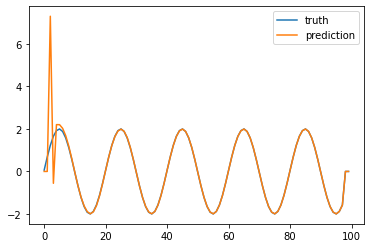

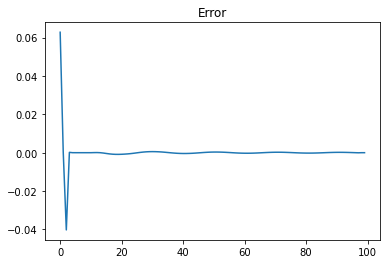

In [124]:
# generating time series data
N = 100
t = np.arange(0.0001, 1.001, 0.001)
data = 2 * np.sin(2 * np.pi * 50 * t)  
ys = data[:N]

M = 10 # looking back M steps to predict the signal
b = np.zeros(M)
t = np.zeros(M)
f = np.zeros(M)
wf = np.zeros(M)
wb = np.zeros(M)
fb = np.zeros(M) 
ff = np.zeros(M) + 0.000001
bb = np.zeros(M) + 0.000001
e = np.zeros(N)

truth = np.zeros(N)
pred = np.zeros(N)

for n in range(N - 2):

    pred[n] = wf @ b        
        
    f[0] = ys[n]
    t[0] = ys[n]  
    truth[n] = ys[n]

    for m in range(M-1):
        
        ff[m] += f[m] * f[m]
        bb[m] += b[m] * b[m]
        fb[m] += f[m] * b[m]

        wb[m] = fb[m] / ff[m]
        wf[m] = fb[m] / bb[m]

        f[m + 1] = f[m] - wf[m] * b[m]
        t[m + 1] = b[m] - wb[m] * f[m]
          
    b = t.copy()
        
    e[n] = f[-1] 

plt.figure(1)
plt.plot(truth)
plt.plot(pred)
plt.legend(["truth", "prediction"])  

plt.figure(2)
plt.title("Error")
plt.plot(e)